# **(ADD HERE THE NOTEBOOK NAME)**

## Objectives

* Using data from Kaggle, answer Business Requirement 1.


## Inputs

Following sets:

* Train

* Validation

* Test



## Outputs

Creating:
* The shapes of images
* Images per label plotted according to their variability and mean
* Plots illustrating the differences between healthy and mildewed leaves






In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/project5/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
work_dir = os.getcwd()
work_dir

'/workspaces/project5'

In [4]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns; sns.set_style("whitegrid")


In [5]:
my_data_dir = 'inputs/datasets/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'
my_data_dir

'inputs/datasets/cherry-leaves'

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available, please create a new version.')
  pass
else:
  os.makedirs(name=file_path)


# version = 'v1'
# file_path = f'outputs/{version}'

# if not os.path.exists(f'{work_dir}/outputs/{version}'):
#     os.makedirs(f'{work_dir}/outputs/{version}')
# else:
#     print('Old version is already available, please create a new version.')

# Analyzing image data and visualizing it

Label for the images are ['powdery_mildew', 'healthy']


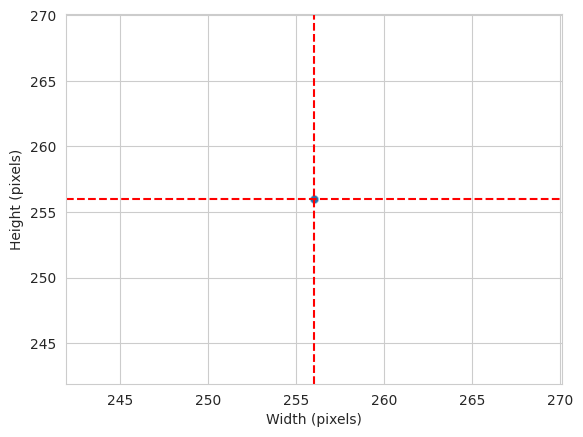

Width average: 256 
Height average: 256


In [7]:
# labels = os.listdir(train_path)
# print('Label for the images are',labels)

# dim1, dim2 = [], []
# for label in labels:
#   # iterate over each file of both folders and get height and width of the image
#   # and append it to the respective array (dim1=height, dim2=width) 
#   for image_filename in os.listdir(train_path + '/'+ label):
#     img = imread(train_path + '/' + label + '/'+ image_filename)
#     d1, d2, colors = img.shape # the shape give as an array with height, width and colors
#     dim1.append(d1) # image height
#     dim2.append(d2) # image width
# # Using matplotlib.pyplot to create the figure and the axes of the plot
# # Using seaborn to give the values to x and y
# fig, axes = plt.subplots()
# sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
# axes.set_xlabel("Width (pixels)")
# axes.set_ylabel("Height (pixels)")
# dim1_mean = int(np.array(dim1).mean())
# dim2_mean = int(np.array(dim2).mean())
# axes.axvline(x=dim1_mean,color='r', linestyle='--')
# axes.axhline(y=dim2_mean,color='r', linestyle='--')
# plt.show()
# print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")



labels = os.listdir(train_path)
print('Label for the images are',labels)

dim1, dim2 = [], []
for label in labels:
  for image_filename in os.listdir(train_path + '/'+ label):
    img = imread(train_path + '/' + label + '/'+ image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
plt.axvline(x=dim1_mean,color='r', linestyle='--')
plt.axhline(y=dim2_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")


In [8]:
image_shape = (64,64,3)
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

In [9]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label = 20):
  """ We generate two arrays, one with images and the other one with labels, so 
      we can analyze the processed images """
      
  X, y = np.array([], dtype='int'), np.array([], dtype='object')
  labels = os.listdir(my_data_dir)

  for label in labels:
    counter = 0
    for image_filename in os.listdir(my_data_dir + '/' + label):
      # n_images_per_label: we set a limit, since it may take too much time
      if counter < n_images_per_label:
        img = image.load_img(my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
        if image.img_to_array(img).max() > 1: 
          img_resized = image.img_to_array(img) / 255
        else: 
          img_resized = image.img_to_array(img)
        
        X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
        y = np.append(y, label)
        counter += 1

  return X, y
  
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

# from tensorflow.keras.preprocessing import image

# def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label=20):
#     X, y = [], []
#     for label in os.listdir(my_data_dir):
#         for image_filename in os.listdir(f"{my_data_dir}/{label}")[:n_images_per_label]:
#             img = image.load_img(f"{my_data_dir}/{label}/{image_filename}", target_size=new_size)
#             img_resized = image.img_to_array(img) / 255.0
#             X.append(img_resized)
#             y.append(label)
#     return np.array(X), np.array(y)


(60, 64, 64, 3) (60,)


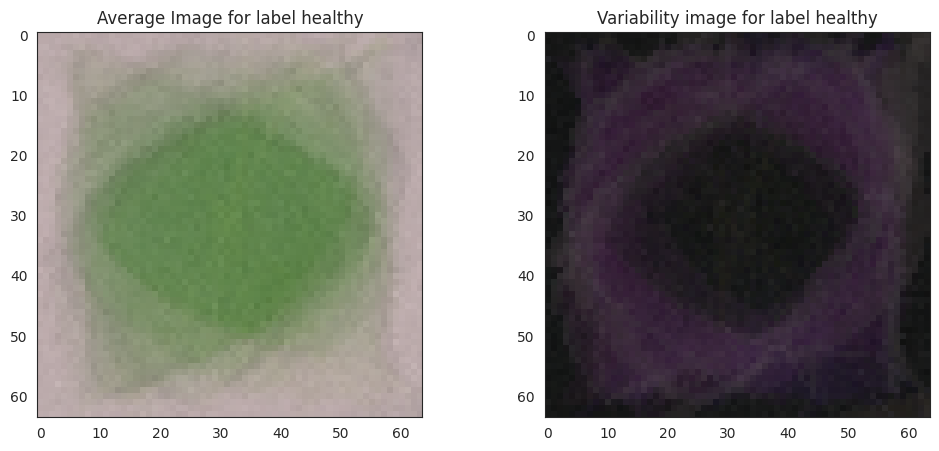

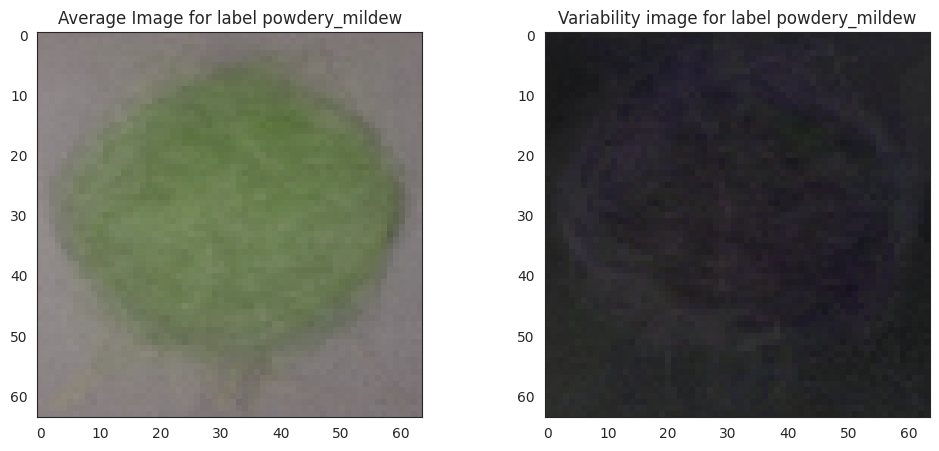

In [13]:
# def plot_mean_variability_per_labels(X, y, figsize=(12,5), save_image=False):
#   """ 
#    The pseudo code for the function is:
#   * Loop in all labels
#   * Subset an array for given label
#   * Calculate mean and standard deviation
#   * Create a figure displaying mean and variability of images
#   * Save image

#   """

#   for label_to_display in np.unique(y):
#     sns.set_style("white")

#     y = y.reshape(-1,1,1)
#     boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
#     arr = X[boolean_mask]
#     avg_img = np.mean(arr, axis = 0)
#     std_img = np.std(arr, axis = 0)
#     print(f"==== Label {label_to_display} ====")
#     print(f"Image Shape: {avg_img.shape}")
#     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
#     axes[0].set_title(f"Average Image for label {label_to_display}")
#     axes[0].imshow(avg_img, cmap='gray')
#     axes[1].set_title(f"Variability image for label {label_to_display}")
#     axes[1].imshow(std_img, cmap='gray')

#     # Save the image
#     if save_image:
#       plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
#     else:
#       plt.tight_layout()
#       plt.show()
#       print("\n")

# plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)




#   """ This function takes in two arrays and for each label it creates an image
#       that shows the mean of all the images of this label, and the variability.
#       INPUTS:
#       * X: Array of images. It is expected to be a tensor with 4 dimensions 
#            (number of images, x_size, y_size, channels)
#       * y: Array of labels. It is expected to be a vector of integers or strings
#       * figsize: Tuple of 2 values for figure size. By default it is (12,5)
#       * save_image: A boolean. If true, it saves the image in the folder defined
#                     in file_path.
#   """
def plot_mean_variability_per_labels(X, y, figsize=(12,5), save_image=False):
  for label in np.unique(y):
    mask = y == label
    arr = X[mask]
    avg_img, std_img = np.mean(arr, axis=0), np.std(arr, axis=0)
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Variability image for label {label}")
    axes[1].imshow(std_img, cmap='gray')
    if save_image:
      plt.savefig(f"{file_path}/avg_var_{label}.png", bbox_inches='tight', dpi=150)
    else:
      plt.tight_layout()
      plt.show()

plot_mean_variability_per_labels(X, y, (12, 5), True)
